<a href="https://colab.research.google.com/github/ipvikas/EasyOCR/blob/master/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ref: https://www.youtube.com/watch?v=ic4chj-iMaI
#https://github.com/ipvikas/EasyOCR
#https://arxiv.org/abs/1507.05717
#https://www.bioinf.jku.at/publications/older/2604.pdf
#https://www.cs.toronto.edu/~graves/icml_2006.pdf

!pip install easyocr

#https://www.youtube.com/watch?v=YttNmkuQYMg

In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 942kB 17.4MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=a9dc4a9965595d1304a5c31167671107711ba37146ee6afc1150628ace22498d
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=b57517dfc756982a68fdc75fb76beb10fb2a489e7c83913f8d6ee465f2d83754
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
!pip install gTTS
#google text to speech package

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=9b8fef4a1479e05c16545e016b90e66ef70ba56ebf952e4662bb1de3d7a1f9d3
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [ ]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

ModuleNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

reader = easyocr.Reader(['en'])
translator = Translator()
#reader = easyocr.Reader(['en', 'hi'])

import PIL
from PIL import ImageDraw

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/OCR/OCR_English.jpg'

path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/OCR/OCR_Hindi.jpg'

# path = '/content/drive/My Drive/Colab Notebooks/DeepLearning/OCR/French.jpg'


In [ ]:
# Image("JD.jpg")
open(path,mode ='r')

In [ ]:
im = PIL.Image.open(path)
im

In [ ]:
bounds = reader.readtext(path,add_margin = 0.55,width_ths=0.7, link_threshold=0.8,decoder='beamsearch', blocklist='=-' )
bounds

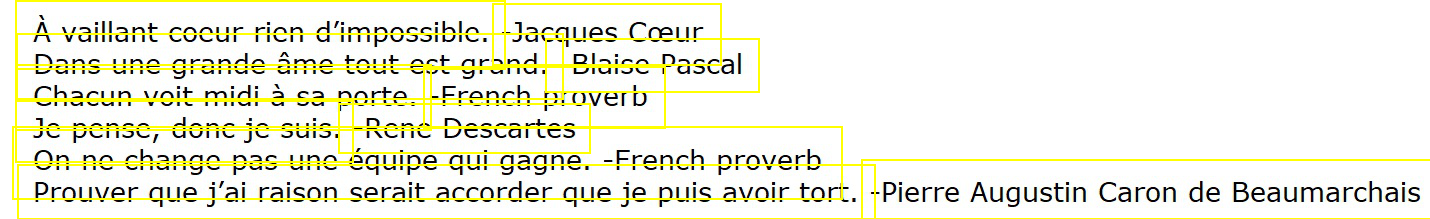

In [ ]:
def draw_boxes(image,bounds,color= 'yellow',width =2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill = color, width = width)
  return image

draw_boxes(im, bounds)


In [ ]:
text_list = reader.readtext(path,add_margin = 0.55,width_ths=0.7, link_threshold=0.8,decoder='beamsearch', blocklist='=-',detail = 0 )
text_list

['À vaillant coeur rien dimpossible.',
 'JJacques Cœur',
 'Dans une grande âme tout est grand.',
 'Blaise Pascal',
 'Chacun voit midià sa porte.',
 'EFrench proverb',
 'Je pense, donc je suis.',
 'Rene Descartes',
 'Ôn ne change pas une équipe qui gagne: French proverb',
 'Pierre Augustin Caron de Beaumarchais',
 'Prouver que jai raison serait accorder que je puis avoir tort.']

In [ ]:
text_comb =' '.join(text_list)
text_comb

'À vaillant coeur rien dimpossible. JJacques Cœur Dans une grande âme tout est grand. Blaise Pascal Chacun voit midià sa porte. EFrench proverb Je pense, donc je suis. Rene Descartes Ôn ne change pas une équipe qui gagne: French proverb Pierre Augustin Caron de Beaumarchais Prouver que jai raison serait accorder que je puis avoir tort.'

In [ ]:
print(translator.detect(text_comb))

Detected(lang=fr, confidence=0.95767623)


In [ ]:
text_en = translator.translate(text_comb,src = 'fr')
print(text_en.text)

With bravery heart nothing is impossible. JJacques Heart In a great soul, everything is great. Blaise Pascal Everyone sees noon at their door. EFrench proverb I think, therefore I am. Rene Descartes Ôn does not change a winning team: French proverb Pierre Augustin Caron de Beaumarchais To prove that I am right would be to agree that I can be wrong.


In [ ]:
ta_tts = gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [ ]:
#Audio('trans.mp3',autoplay =True)

In [ ]:
ta_tts = gTTS(text_en.text,lang = 'fr')
ta_tts.save('trans.mp3')

In [ ]:
#Audio('trans.mp3',autoplay =True)

In [ ]:
text_hi = translator.translate(text_comb,src='fr',dest = 'hi')
print(text_hi.text)

बहादुरी भरे दिल के साथ कुछ भी असंभव नहीं है। जेजेकेस हार्ट एक महान आत्मा में, सब कुछ महान है। ब्लेस पास्कल हर कोई अपने दरवाजे पर दोपहर देखता है। ईफ्रेंच कहावत मुझे लगता है, इसलिए मैं हूं। रेने डेसकार्टेस एक विजेता टीम को नहीं बदलता है: फ्रेंच कहावत पियरे ऑगस्टिन कैरन डे ब्यूमरैचिस यह साबित करने के लिए कि मैं सही हूं इस बात से सहमत होना होगा कि मैं गलत हो सकता हूं।


In [ ]:
ta_tts = gTTS(text_hi.text,lang = 'hi')
ta_tts.save('trans_hi.mp3')
Audio('trans_hi.mp3',autoplay =True)

In [ ]:
output = reader.readtext(path)
output

[([[31, 15], [709, 15], [709, 54], [31, 54]],
  "A vaillant coeur rien d'impossible. -Jacques Cœur",
  0.005584497004747391),
 ([[31, 47], [548, 47], [548, 85], [31, 85]],
  'Dans une grande âme tout est grand.',
  0.09938760101795197),
 ([[556, 50], [747, 50], [747, 80], [556, 80]],
  '-Blaise Pascal',
  0.37524136900901794),
 ([[425, 79], [654, 79], [654, 117], [425, 117]],
  'French proverb',
  0.288070946931839),
 ([[32, 80], [286, 80], [286, 112], [32, 112]],
  'Chacun voit midi à',
  0.3768364489078522),
 ([[294, 84], [416, 84], [416, 116], [294, 116]],
  'sa porte.',
  0.5825051069259644),
 ([[29, 113], [341, 113], [341, 149], [29, 149]],
  'Je pense, donc je suis.',
  0.02332923375070095),
 ([[350, 114], [580, 114], [580, 144], [350, 144]],
  'Rene Descartes',
  0.13480980694293976),
 ([[79, 142], [591, 142], [591, 183], [79, 183]],
  'ne change pas une équipe qui gagne.',
  0.1823815107345581),
 ([[599, 144], [827, 144], [827, 181], [599, 181]],
  'French proverb',
  0.2321859

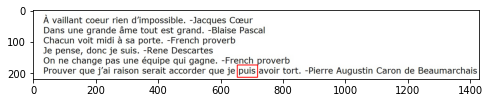

In [ ]:
cord = output[-1][0]
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

image = cv2.imread(path)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
#https://www.youtube.com/watch?v=N1AIB2buJDw
#OCR - Banking Check Image MICR Extraction in Python
#TRY


In [ ]:
! apt install tesseract.ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'tesseract-ocr-chi-tra-vert' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-laoo' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-latn' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-chi-sim-vert' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-frak' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-cyrl' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-sinh' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-hang' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-hans' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-hant' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-hant-vert' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-script-jpan-vert' for regex 'tesseract.ocr'
Note, selecting 'tesseract-ocr-lang' for regex 'tess

In [ ]:
! apt install libtesseract-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
! pip install pytesseract

In [ ]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

In [ ]:
!ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 26712 Apr  7  2018 /usr/bin/tesseract


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

image = Image.open('/content/drive/My Drive/Colab Notebooks/DeepLearning/OCR/delete.jpeg')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


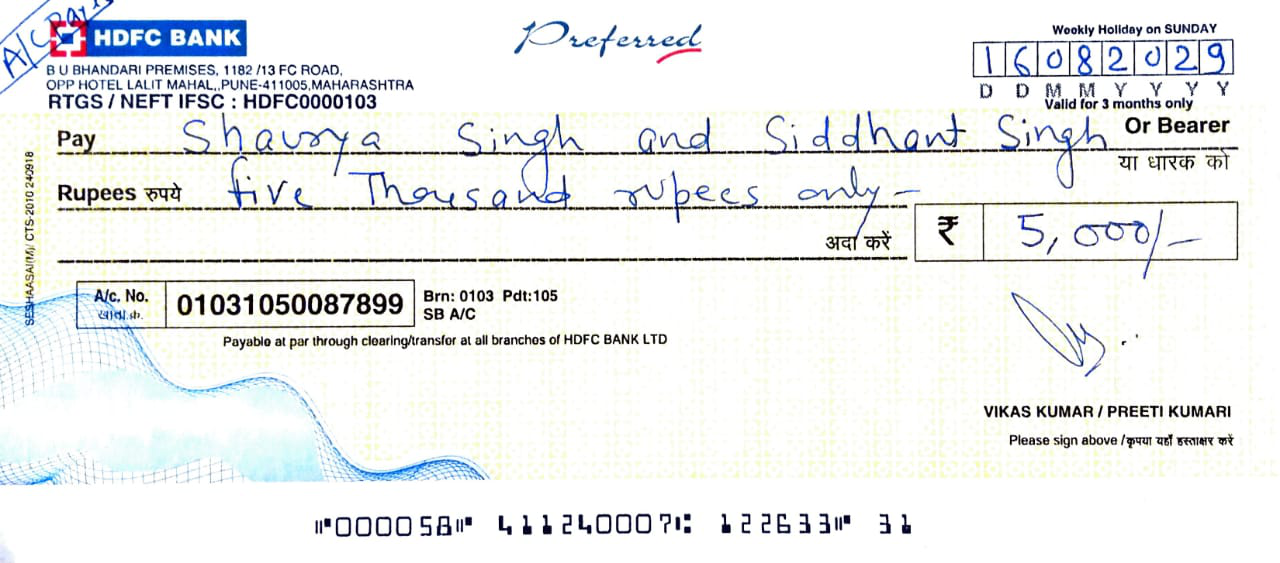

In [ ]:
image

Cheque number: 000058
City(three digit): 411
Bank code(Three digit): 240
Branchcode(three digit): 007
RBI code (6 digit): 122633
leaflet number (2 digit): 31

In [ ]:
print(pytesseract.image_to_string(image, lang = 'eng'))



,
a.

PTO JO referred
® BU BHANDARI PREMISES, 1182/13 FC ROAD,

OPP HOTEL LALIT MAHAL, PUNE-41 1005, MAHARASHTRA
RTGS / NEFT ch HDFC0000103

 

Inf! CTS-2010 240018

mupeeswt Sve Thousas hess enle

 

j Neto | 01031050087899 | B47 Pat*®

\ Payablo at par through cloaringiransfor at all branches of HDFC BANK LTD

iM

 

 

 

 

wOOOOSHh GhichLOOO?e b2eeBaiuw 3h

py Sh Lavery a__Sin. and __Siddavt

Wookly Holiday on SUNDAY

LUclol& = of2{5]

M
Valid i 3 Monn ent

“cy os | Or oer

 

 

 

 

 

 

 

 

 

 

 

oy aE

 

Ry

-

VIKAS KUMAR / PREETI KUMARI
Please sign above var zal wemere we

 



In [ ]:
#https://github.com/BigPino67/Tesseract-MICR-OCR
# !wget https://github.com/BigPino67/Tesseract-MICR-OCR

!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2020-08-16 12:30:20--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata’

mcr.traineddata     100%[===================>] 143.91K  --.-KB/s    in 0.02s   

2020-08-16 12:30:21 (5.79 MB/s) - ‘mcr.traineddata’ saved [147363/147363]



In [ ]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [ ]:
check_img = cv2.cvtColor(np.array(image),cv2.COLOR_RGB2BGR)
# micr_img = check_img[625:717,0:1630]

micr_img = check_img[499:556,0:1280]
check_img.shape

(563, 1280, 3)

In [ ]:
micr_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[251, 230, 222],
        [252, 231, 223],
        [252, 231, 223],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 234, 226],
        [255, 233, 225],
        [254, 233, 225],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 234, 226],
        [255, 233, 225],
        [255, 232, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

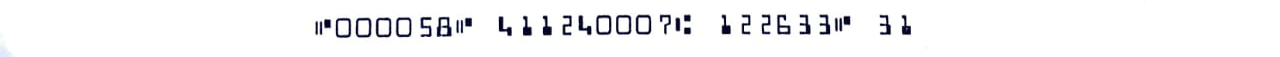

In [ ]:
import google.colab.patches
google.colab.patches.cv2_imshow(micr_img)

In [ ]:
print(pytesseract.image_to_string(micr_img, lang = 'mcr'))

c000058c 411240007a 122633c 31

